In [ ]:
# Gross rents in Chinatown, Echo Park, Lincoln Heights, and Elysian Park, by block group
# Gross rent represents monthly housing cost expenses for renters (contract rent plus estimated average monthly cost of utilities)
# Dom Ong

In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import pandas as pd
import geopandas as gpd

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

In [2]:
# Set working dir & get data
cwd = os.getcwd()
print('Current Working Directory is: ', cwd)

Current Working Directory is:  /Users/dominiqueong/Documents/Grad School/Classes/221/Census


In [3]:
# Import Census data
# Import block group rent CSV from Social Explorer
blockgroup_rent_table_path = os.path.join("Tables","blockgroup","rent","socialexplorer","R13282959_SL150.csv")
# Import CSV and specify FIPS columns as a string
blockgroup_rent_table = pd.read_csv(blockgroup_rent_table_path,
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)
blockgroup_rent_table.head()
blockgroup_rent_table.info()
print(list(blockgroup_rent_table))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Columns: 148 entries, Geo_FIPS to PCT_SE_A10053B_011
dtypes: float64(86), int64(54), object(8)
memory usage: 7.4+ MB
['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_US', 'Geo_REGION', 'Geo_DIVISION', 'Geo_STATECE', 'Geo_STATE', 'Geo_COUNTY', 'Geo_COUSUB', 'Geo_PLACE', 'Geo_TRACT', 'Geo_BLKGRP', 'Geo_CONCIT', 'Geo_AIANHH', 'Geo_AIANHHFP', 'Geo_AIHHTLI', 'Geo_AITSCE', 'Geo_AITS', 'Geo_ANRC', 'Geo_CBSA', 'Geo_CSA', 'Geo_METDIV', 'Geo_MACC', 'Geo_MEMI', 'Geo_NECTA', 'Geo_CNECTA', 'Geo_NECTADIV', 'Geo_UA', 'Geo_UACP', 'Geo_CDCURR', 'Geo_SLDU', 'Geo_SLDL', 'Geo_VTD', 'Geo_ZCTA3', 'Geo_ZCTA5', 'Geo_SUBMCD', 'Geo_SDELM', 'Geo_SDSEC', 'Geo_SDUNI', 'Geo_UR', 'Geo_PCI', 'Geo_TAZ', 'Geo_UGA', 'Geo_PUMA5', 'Geo_PUMA1', 'Geo_GEOID', 'Geo_NAME', 'Geo_BTTR', 'Geo_BTBG', 'Geo_PLACESE', 'SE_A18001_001', 'SE_A18001_002', 'SE_A18001_003', 'SE_A18001_004', 'SE_A18001_005', 'SE_A

In [4]:
# Import block group geojson file from LA County GIS Hub
import geopandas as gpd
# Read in 2020 block group geojson file
blockgroups_path = os.path.join("GeoJSON","Census_Block_Groups_2020.geojson")
blockgroups = gpd.read_file(blockgroups_path)
# Create a FIPS column
blockgroups['Geo_FIPS'] ='06' + '037' + blockgroups['BG20']
blockgroups.head()

,OBJECTID,BG20,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,Geo_FIPS
0,1,1011101,101110,BG 1,4.814335e+06,8706.027651,"POLYGON ((-118.28497 34.25678, -118.28497 34.2...",060371011101
1,2,1011102,101110,BG 2,3.814445e+06,8807.809581,"POLYGON ((-118.29265 34.25957, -118.29319 34.2...",060371011102
2,3,1011103,101110,BG 3,3.666841e+06,8335.114480,"POLYGON ((-118.29134 34.25956, -118.29134 34.2...",060371011103
3,4,1011221,101122,BG 1,1.711345e+07,19507.471377,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",060371011221
4,5,1011222,101122,BG 2,1.134430e+07,19207.990424,"POLYGON ((-118.28528 34.26644, -118.28541 34.2...",060371011222


,OBJECTID,name,geometry
1,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0..."
3,57,Lincoln Heights,"POLYGON ((-118.21218 34.08389, -118.21194 34.0..."
0,21,Chinatown,"POLYGON ((-118.22473 34.06758, -118.22703 34.0..."
2,29,Elysian Park,"POLYGON ((-118.24246 34.09391, -118.24057 34.0..."


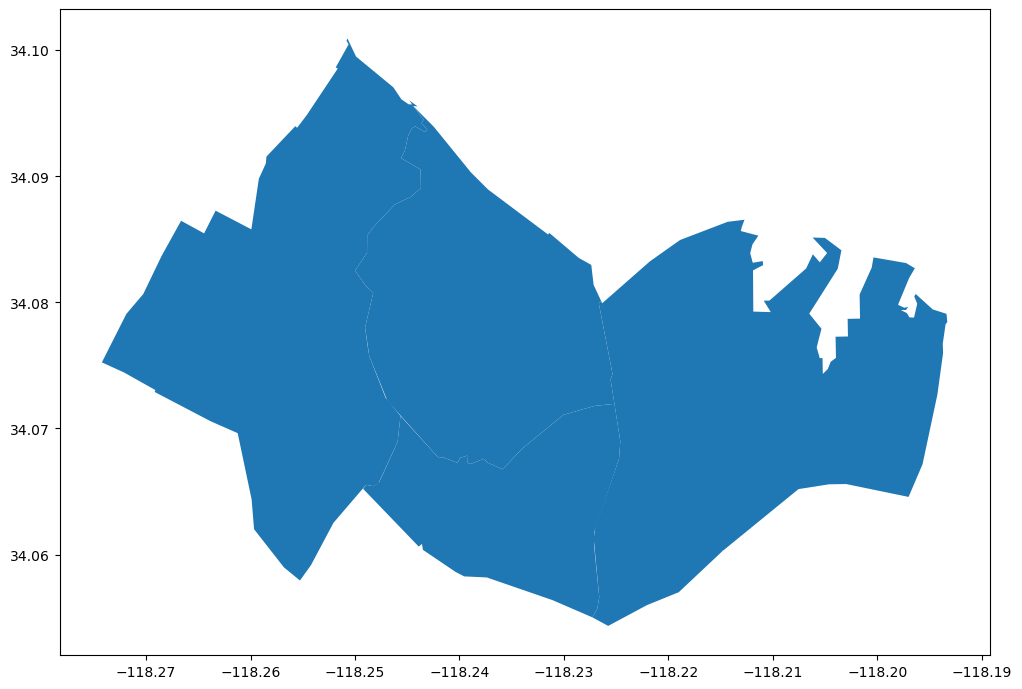

In [5]:
# Import Chinatown, Lincoln Heights, Elysian Park, and Echo Park neighborhood boundaries from LA City GeoHub
neighborhood_bd_path = os.path.join("SHP","neighborhood","LA_Times_Neighborhood_Boundaries","LA_Times_Neighborhood_Boundaries.shp")
neighborhood_bd = gpd.read_file(neighborhood_bd_path)
neighborhood_bd.plot(figsize=(12,10))
neighborhood_bd.sample(4)


In [25]:
# Subset neighborhood boundaries by individual neighborhood (Chinatown, Lincoln Heights, Elysian Park, and Echo Park)
# Chinatown
neighborhood_chinatown = neighborhood_bd[neighborhood_bd['name']=="Chinatown"]
neighborhood_chinatown.info()
# Lincoln Heights
neighborhood_lh = neighborhood_bd[neighborhood_bd['name']=="Lincoln Heights"]
neighborhood_lh.info()
# Elysian Park
neighborhood_ely = neighborhood_bd[neighborhood_bd['name']=="Elysian Park"]
neighborhood_ely.info()
# Echo Park
neighborhood_ec = neighborhood_bd[neighborhood_bd['name']=="Echo Park"]
neighborhood_ec.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  1 non-null      int64   
 1   name      1 non-null      object  
 2   geometry  1 non-null      geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 32.0+ bytes
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 3 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  1 non-null      int64   
 1   name      1 non-null      object  
 2   geometry  1 non-null      geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 32.0+ bytes
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 2 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  1 non-null      int64   
 1   name      1 non-n

In [6]:
# Drop columns in CSV
# Define columns to keep in CSV
columns_to_keep = ['Geo_FIPS','Geo_STATE','Geo_COUNTY','SE_A18001_001','SE_A18001_002','SE_A18001_003',
                   'SE_A18001_004','SE_A18001_005','SE_A18001_006','SE_A18001_007','SE_A18001_008','SE_A18001_009',
                   'PCT_SE_A18001_002','PCT_SE_A18001_003','PCT_SE_A18001_004','PCT_SE_A18001_005','PCT_SE_A18001_006',
                   'PCT_SE_A18001_007','PCT_SE_A18001_008','PCT_SE_A18001_009','SE_A18009_001']
# Create subset, add to a new dataframe
rent_csv = blockgroup_rent_table[columns_to_keep]
# Create list of existing columns
columns = list(rent_csv)
columns
# Rename columns using data dictionary TXT
rent_csv.columns = ['Geo_FIPS','Geo_STATE','Geo_COUNTY','Renter-Occupied Housing Units with Cash Rent','Renter-Occupied Housing Units with Cash Rent: Less than 300',
                    'Renter-Occupied Housing Units with Cash Rent: 300 to 599','Renter-Occupied Housing Units with Cash Rent: 600 to 799',
                    'Renter-Occupied Housing Units with Cash Rent: 800 to 999','Renter-Occupied Housing Units with Cash Rent: 1,000 to 1,249',
                    'Renter-Occupied Housing Units with Cash Rent: 1,250 to 1,499','Renter-Occupied Housing Units with Cash Rent: 1,500 to 1,999',
                    'Renter-Occupied Housing Units with Cash Rent: 2,000 or More','% Renter-Occupied Housing Units with Cash Rent: Less than 300',
                    '% Renter-Occupied Housing Units with Cash Rent: 300 to 599','% Renter-Occupied Housing Units with Cash Rent: 600 to 799',
                   '% Renter-Occupied Housing Units with Cash Rent: 800 to 999','% Renter-Occupied Housing Units with Cash Rent: 1,000 to 1,249',
                    '% Renter-Occupied Housing Units with Cash Rent: 1,250 to 1,499','% Renter-Occupied Housing Units with Cash Rent: 1,500 to 1,999',
                    '% Renter-Occupied Housing Units with Cash Rent: 2,000 or More','Median Gross Rent']
# Create list of existing columns
columns = list(rent_csv)
columns
rent_csv.sample(5)

,Geo_FIPS,Geo_STATE,Geo_COUNTY,Renter-Occupied Housing Units with Cash Rent,Renter-Occupied Housing Units with Cash Rent: Less than 300,Renter-Occupied Housing Units with Cash Rent: 300 to 599,Renter-Occupied Housing Units with Cash Rent: 600 to 799,Renter-Occupied Housing Units with Cash Rent: 800 to 999,"Renter-Occupied Housing Units with Cash Rent: 1,000 to 1,249","Renter-Occupied Housing Units with Cash Rent: 1,250 to 1,499",...,"Renter-Occupied Housing Units with Cash Rent: 2,000 or More",% Renter-Occupied Housing Units with Cash Rent: Less than 300,% Renter-Occupied Housing Units with Cash Rent: 300 to 599,% Renter-Occupied Housing Units with Cash Rent: 600 to 799,% Renter-Occupied Housing Units with Cash Rent: 800 to 999,"% Renter-Occupied Housing Units with Cash Rent: 1,000 to 1,249","% Renter-Occupied Housing Units with Cash Rent: 1,250 to 1,499","% Renter-Occupied Housing Units with Cash Rent: 1,500 to 1,999","% Renter-Occupied Housing Units with Cash Rent: 2,000 or More",Median Gross Rent
1566,060372125011,06,037,859,6,6,0,70,189,216,...,85,0.70,0.70,0.00,8.15,22.00,25.15,33.41,9.90,1433.0
3630,060374333041,06,037,380,33,43,22,10,66,47,...,34,8.68,11.32,5.79,2.63,17.37,12.37,32.89,8.95,1335.0
4339,060375321012,06,037,343,0,0,0,8,54,151,...,9,0.00,0.00,0.00,2.33,15.74,44.02,35.28,2.62,1431.0
2554,060372932042,06,037,116,0,0,0,0,0,0,...,49,0.00,0.00,0.00,0.00,0.00,0.00,57.76,42.24,1933.0
3635,060374333062,06,037,209,9,8,0,0,47,71,...,40,4.31,3.83,0.00,0.00,22.49,33.97,16.27,19.14,1393.0


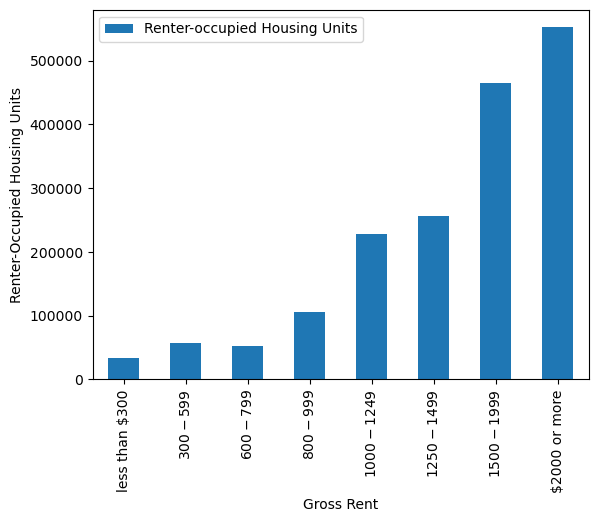

In [51]:
# Sum values (number of Renter-Occupied Housing Units) in each column (each gross rent category), save as variable
sum_rent_300 = rent_csv['Renter-Occupied Housing Units with Cash Rent: Less than 300'].sum()
sum_rent_300_599 = rent_csv['Renter-Occupied Housing Units with Cash Rent: 300 to 599'].sum()
sum_rent_600_799 = rent_csv['Renter-Occupied Housing Units with Cash Rent: 600 to 799'].sum()
sum_rent_800_999 = rent_csv['Renter-Occupied Housing Units with Cash Rent: 800 to 999'].sum()
sum_rent_1000_1249 = rent_csv['Renter-Occupied Housing Units with Cash Rent: 1,000 to 1,249'].sum()
sum_rent_1250_1499 = rent_csv['Renter-Occupied Housing Units with Cash Rent: 1,250 to 1,499'].sum()
sum_rent_1500_1999 = rent_csv['Renter-Occupied Housing Units with Cash Rent: 1,500 to 1,999'].sum()
sum_rent_2000 = rent_csv['Renter-Occupied Housing Units with Cash Rent: 2,000 or More'].sum()
# Plot total Renter-Occupied Housing Units by gross rent
# Rotate x axis labels by 90 degrees
df = pd.DataFrame({'Gross Rent':['less than $300', '$300-$599', '$600-$799','$800-$999','$1000-$1249','$1250-$1499','$1500-$1999','$2000 or more'], 'Renter-occupied Housing Units':[sum_rent_300,sum_rent_300_599,sum_rent_600_799,sum_rent_800_999,sum_rent_1000_1249,sum_rent_1250_1499,sum_rent_1500_1999,sum_rent_2000]})
ax = df.plot.bar(x='Gross Rent', y='Renter-occupied Housing Units', ylabel = 'Renter-Occupied Housing Units',rot=90)

In [8]:
# Join rent block group CSV to block group geojson
# Create a new dataframe based on the join
blockgroups_rent = blockgroups.merge(rent_csv,on="Geo_FIPS")
blockgroups_rent.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6438 entries, 0 to 6437
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype   
---  ------                                                          --------------  -----   
 0   OBJECTID                                                        6438 non-null   int64   
 1   BG20                                                            6438 non-null   object  
 2   CT20                                                            6438 non-null   object  
 3   LABEL                                                           6438 non-null   object  
 4   ShapeSTArea                                                     6438 non-null   float64 
 5   ShapeSTLength                                                   6438 non-null   float64 
 6   geometry                                                        6438 non-null   geometry
 7   Geo_FIPS                          

blockgroups_rent epsg:4326
neighborhood_bd epsg:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 75 entries, 1041 to 6411
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype   
---  ------                                                          --------------  -----   
 0   OBJECTID                                                        75 non-null     int64   
 1   BG20                                                            75 non-null     object  
 2   CT20                                                            75 non-null     object  
 3   LABEL                                                           75 non-null     object  
 4   ShapeSTArea                                                     75 non-null     float64 
 5   ShapeSTLength                                                   75 non-null     float64 
 6   geometry                                                        75 non-nul

/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/sf/dcmth9m12fv8jfbyt12xs88w0000gn/T/ipykernel_25251/572234223.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  blockgroups_rent_clip.to_file('blockgroups_rent_clip.shp')


<AxesSubplot:>

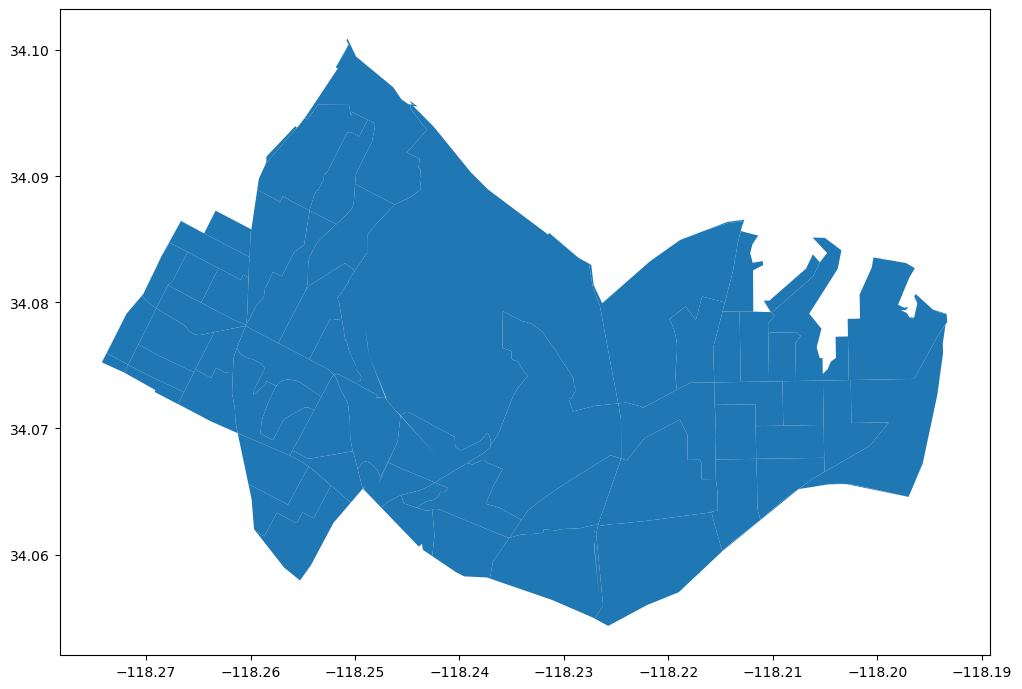

In [10]:
# Check if neighborhood boundary and rent block groups all in the same coordinate reference system (if not, need to reproject)
print("blockgroups_rent", blockgroups_rent.crs)
print("neighborhood_bd", neighborhood_bd.crs)
# Both EPSG 4326
# Clip rent block groups to neighborhood boundary (Chinatown, Echo Park, Lincoln Heights, Elysian Park)
blockgroups_rent_clip = gpd.clip(blockgroups_rent, neighborhood_bd)
# Write clipped rent block groups to shapefile
blockgroups_rent_clip.to_file('blockgroups_rent_clip.shp')
blockgroups_rent_clip.info()
# Plot clipped rent block groups
blockgroups_rent_clip.plot(figsize=(12,10))

In [22]:
# Import the folium library
import folium

# Create a map of median gross rent in Chinatown, Echo Park, Lincoln Heights, and Elysian Park by block group
# Create subset of the clipped rent block group data, add to a new dataframe
map_columns_to_keep = ['Geo_FIPS','Median Gross Rent','geometry']
# Remove special characters in column names
rent_map = blockgroups_rent_clip[map_columns_to_keep]
rent_map.columns = ['FIPS','MedianGrossRent','geometry']
# Remove rows where median gross rent is empty
rent_map = rent_map.dropna(axis=0,how="all")
rent_map.info()
# Reinspect data
rent_map.head()

# Initialize the map, store it in a m object
m = folium.Map(location=[34.062217575747276, -118.23859481266341], zoom_start=13,tiles='CartoDB positron', attribution='CartoDB')

# Show the map
m

# Plot choropleth over the base map
folium.Choropleth(
    geo_data=rent_map, # geo data
    name="choropleth",
    data=rent_csv, # data
    columns=["Geo_FIPS", "Median Gross Rent"], # [key, value]
    key_on="feature.properties.FIPS", # key, or merge column
    fill_color="YlGn", 
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Median Gross Rent", # name on the legend color bar
).add_to(m)

folium.LayerControl().add_to(m)

m

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 75 entries, 1041 to 6411
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   FIPS             75 non-null     object  
 1   MedianGrossRent  75 non-null     float64 
 2   geometry         75 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 2.3+ KB
